In [5]:
import numpy as np
import pandas as pd

# -----------------------------
# Metric functions (as given)
# -----------------------------
def nse(obs: np.ndarray, sim: np.ndarray) -> float:
    m = np.nanmean(obs)
    denom = np.nansum((obs - m) ** 2)
    if denom == 0 or np.isnan(denom):
        return np.nan
    return 1.0 - np.nansum((sim - obs) ** 2) / denom

def nnse(obs, sim):
    v = nse(obs, sim)
    return np.nan if np.isnan(v) else 1.0 / (2.0 - v)

def mse(obs, sim):
    return np.nanmean((sim - obs) ** 2)

def mae(obs, sim):
    return np.nanmean(np.abs(sim - obs))

def kge(obs, sim) -> float:
    obs_m, sim_m = np.nanmean(obs), np.nanmean(sim)
    obs_s, sim_s = np.nanstd(obs, ddof=0), np.nanstd(sim, ddof=0)
    valid = np.isfinite(obs) & np.isfinite(sim)
    if valid.sum() < 2 or obs_s == 0 or np.isnan(obs_m) or np.isnan(sim_m):
        return np.nan
    r = np.corrcoef(obs[valid], sim[valid])[0, 1]
    beta = np.nan if obs_m == 0 else sim_m / obs_m
    gamma = np.nan if (sim_m == 0 or obs_m == 0 or obs_s == 0) else (sim_s / sim_m) / (obs_s / obs_m)
    if np.isnan(r) or np.isnan(beta) or np.isnan(gamma):
        return np.nan
    return 1 - np.sqrt((r - 1) ** 2 + (beta - 1) ** 2 + (gamma - 1) ** 2)

def mape(obs, sim):
    valid = np.isfinite(obs) & np.isfinite(sim) & (obs != 0)
    return np.nanmean(np.abs((sim[valid] - obs[valid]) / obs[valid])) * 100

def rnse(obs, sim):
    # normalized NSE (divides by sum of obs^2)
    denom = np.nansum(obs ** 2)
    if denom == 0 or np.isnan(denom):
        return np.nan
    return 1.0 - np.nansum((sim - obs) ** 2) / denom

def rmae(obs, sim):
    valid = np.isfinite(obs) & np.isfinite(sim) & (obs != 0)
    return np.nanmean(np.abs((sim[valid] - obs[valid]) / obs[valid])) * 100  # now %

def nrmse(obs, sim):
    rmse = np.sqrt(np.nanmean((sim - obs) ** 2))
    obs_range = np.nanmax(obs) - np.nanmin(obs)
    return (rmse / obs_range) * 100 if obs_range != 0 else np.nan  # now %



METRIC_FUNS = {
    "NSE": nse,
    "NNSE": nnse,
    "MSE": mse,
    "MAE": mae,
    "KGE": kge,
    "rNSE": rnse,
    "rMAE": rmae,
    "MAPE (%)": mape,
    "NRMSE": nrmse
}


# -----------------------------
# Configuration
# -----------------------------
file_path = "for_scatterplot.xlsx"

OBS_COLUMN = "Qm (Thebes)"  

SIM_COLUMN = "Qnew"

def compute_metrics(obs: pd.Series, sim: pd.Series) -> dict:
    data = pd.concat([obs, sim], axis=1).dropna()
    if data.empty:
        return {k: np.nan for k in METRIC_FUNS} | {"N": 0}

    o = data.iloc[:, 0].to_numpy()
    s = data.iloc[:, 1].to_numpy()
    metrics = {name: func(o, s) for name, func in METRIC_FUNS.items()}
    metrics["N"] = len(data)
    return metrics

# --------------------------------------------------
# Process all sheets
# --------------------------------------------------
xls = pd.ExcelFile(file_path)
results = []

for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    if OBS_COLUMN not in df.columns or SIM_COLUMN not in df.columns:
        print(f"Skipping '{sheet}' (columns missing)")
        continue

    metrics = compute_metrics(df[OBS_COLUMN], df[SIM_COLUMN])
    results.append({"Sheet": sheet} | metrics)

# --------------------------------------------------
# Create summary table
# --------------------------------------------------
summary = pd.DataFrame(results)
pd.set_option("display.max_columns", None)
print(summary)

# Optionally save to Excel
output_file = "model_metrics_summary.xlsx"
summary.to_excel(output_file, index=False)
print(f"\nSaved metrics to: {output_file}")

      Sheet       NSE      NNSE           MSE          MAE       KGE  \
0      RT 1  0.999833  0.999833  4.890145e+06  1705.750742  0.993736   
1  Method_2  0.999084  0.999085  2.684756e+07  4562.601232  0.981294   
2      RT 2  0.999890  0.999890  3.222864e+06  1555.080283  0.993435   
3    Method  0.994972  0.994997  1.473408e+08  5509.050019  0.963431   

       rNSE      rMAE  MAPE (%)     NRMSE       N  
0  0.999953  0.642635  0.642635  0.253278  106822  
1  0.999740  1.975157  1.975157  0.593456  106822  
2  0.999969  0.705091  0.705091  0.205616  106822  
3  0.998571  1.361061  1.361061  1.390265  106822  

Saved metrics to: model_metrics_summary.xlsx


=== FILE CHECK ===
ABS PATH: /media/12TB/Sujan/NWM/Codes/LRF_RC/Validation/for_scatterplot.xlsx
Exists?  True
Modified: Tue Dec  2 15:17:30 2025
Size    : 18072407 bytes
MD5     : c1ae704ac841914cdc66991a401ebf9e

Sheets found (repr):
  'RT 1'
  'Method_2'
  'RT 2'
  'Method'

=== READING & PLOTTING ===

Reading sheet: requested='RT 1' -> actual='RT 1'


/tmp/ipykernel_104167/3233818483.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


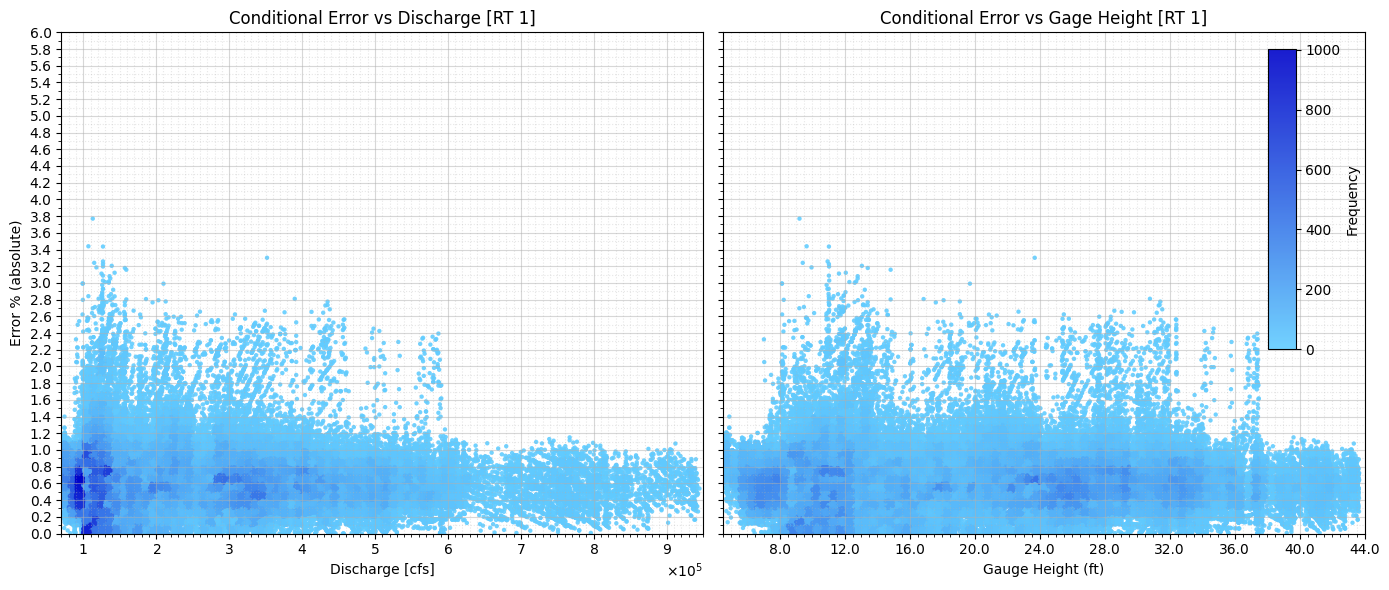


Reading sheet: requested='Method_2' -> actual='Method_2'


/tmp/ipykernel_104167/3233818483.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


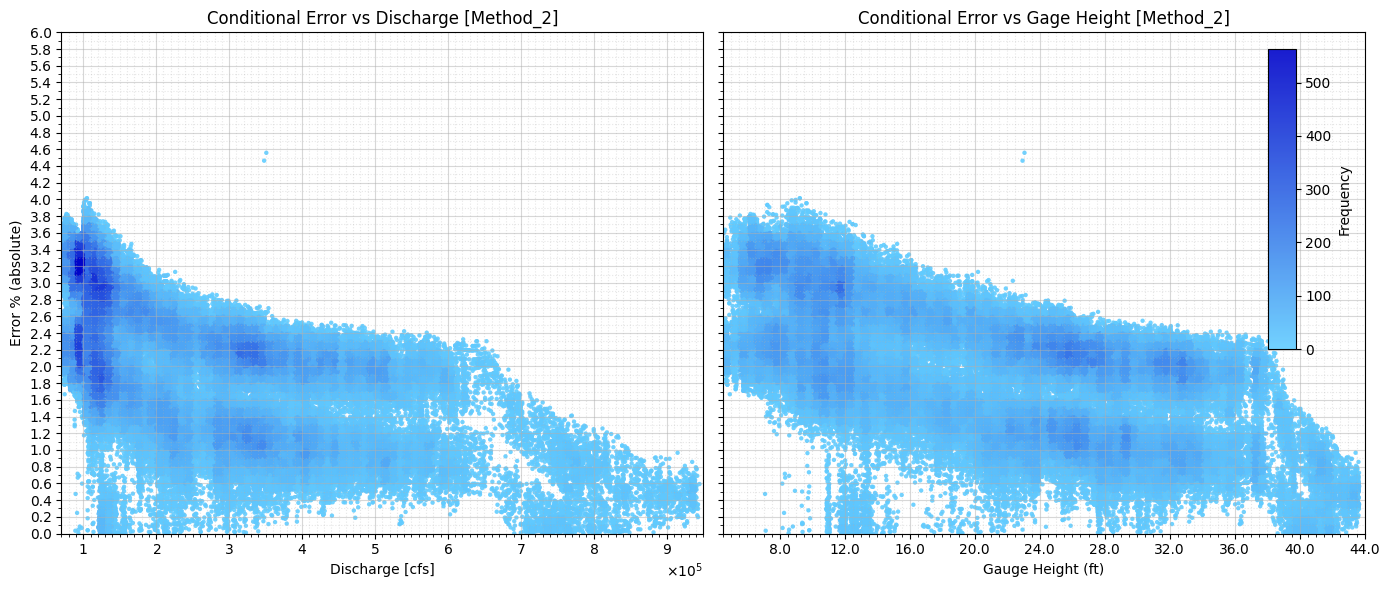


Reading sheet: requested='RT 2' -> actual='RT 2'


/tmp/ipykernel_104167/3233818483.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


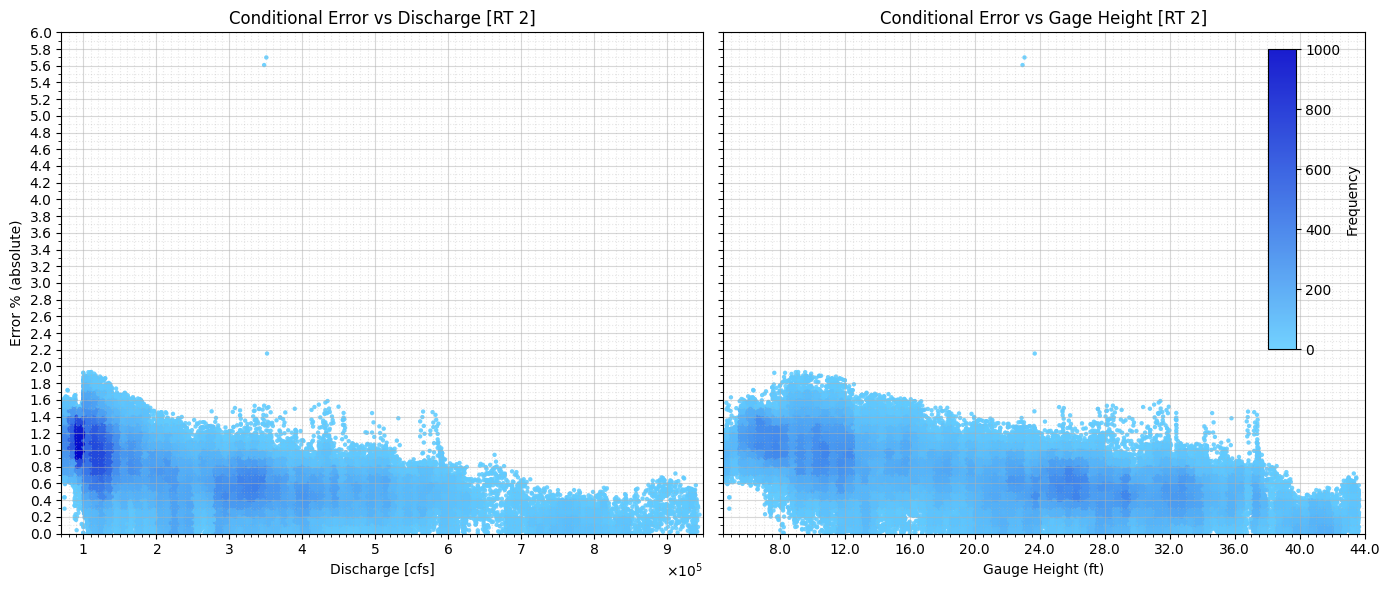

In [23]:
import os
import re
import time
import hashlib
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.ticker import FixedLocator, ScalarFormatter, FuncFormatter
from matplotlib.ticker import MultipleLocator


# ========= USER CONFIG =========
FILE_PATH = "for_scatterplot.xlsx"   # use absolute path if on server/mount
REQUESTED_SHEETS = ["RT 1", "Method_2", "RT 2", "Method_4"]  # what you want to load
# =================================


# ---- Colormap (light to deep blue) ----
Blue_hue = LinearSegmentedColormap.from_list("Blue_hue", ["#62CDFF", "#0003ca"])


# ---------- UTILITIES ----------
def file_info(path: Path):
    """Print absolute file info to confirm you're reading the right workbook."""
    print("ABS PATH:", path.resolve())
    if not path.exists():
        print("Exists?  False")
        return
    print("Exists?  True")
    st = path.stat()
    print("Modified:", time.ctime(st.st_mtime))
    print("Size    :", st.st_size, "bytes")
    try:
        md5 = hashlib.md5(path.read_bytes()).hexdigest()
        print("MD5     :", md5)
    except Exception as e:
        print("MD5     : <error reading>", e)

def _aligned_limits(vmin, vmax, step):
    lo = step * np.floor(vmin / step)
    hi = step * np.ceil(vmax / step)
    if hi == lo:
        hi = lo + step
    return lo, hi

def normalize_name(name: str) -> str:
    """Normalize names to map requested -> actual sheet names robustly."""
    # replace common unicode spaces with normal space
    name = name.replace("\u00A0", " ").replace("\u2007", " ").replace("\u202F", " ")
    name = name.strip().lower()
    # collapse spaces/underscores/hyphens
    name = re.sub(r"[\s_\-]+", "", name)
    return name


def resolve_sheet_names(xls: pd.ExcelFile, requested: list[str]) -> list[tuple[str, str]]:
    """
    Return list of (requested, actual) names to read.
    Skips any requested sheet that can't be matched after normalization.
    """
    actual = xls.sheet_names
    print("\nSheets found (repr):")
    for s in actual:
        print(" ", repr(s))

    norm_map = {normalize_name(s): s for s in actual}
    resolved = []
    for r in requested:
        key = normalize_name(r)
        real = norm_map.get(key)
        if real:
            resolved.append((r, real))
        else:
            print(f"WARNING: Requested sheet '{r}' not found after normalization.")
    return resolved


# ---------- BINNING HELPERS ----------
def _midpoints(edges):
    return (edges[:-1] + edges[1:]) / 2.0


def _bin_counts_for_xy(x, y, x_edges, y_edges):
    ix = np.digitize(x, x_edges) - 1
    iy = np.digitize(y, y_edges) - 1
    mask = (ix >= 0) & (ix < len(x_edges) - 1) & (iy >= 0) & (iy < len(y_edges) - 1)
    ix, iy = ix[mask], iy[mask]
    x, y = x[mask], y[mask]
    counts = np.zeros((len(x_edges) - 1, len(y_edges) - 1), dtype=int)
    np.add.at(counts, (ix, iy), 1)
    c = counts[ix, iy]
    return x, y, counts, c


def _tick_midpoints(edges, tick_spacing, bin_width):
    """Select midpoint ticks at the requested interval (axis units)."""
    mids = _midpoints(edges)
    N = max(1, int(round(tick_spacing / bin_width)))
    return mids[::N]


# ---------- MAIN PLOT ----------
def scatter_two_panels_same_scale(
    df, sheet_name,
    # bin sizes (minor grid)
    q_step=10_000, q_max=1_000_000,
    gh_step=0.5, gh_max=45.0,
    y_step=0.1, y_max=6.0,
    # labeled tick spacing (major grid)
    q_tick_step=200_000,
    gh_tick_step=4.0,
    y_tick_step=0.2,
):
    # ---- Build edges
    x_edges_Q  = np.arange(0, q_max + q_step, q_step)
    x_edges_GH = np.arange(0, gh_max + gh_step, gh_step)
    y_edges    = np.arange(0, y_max + y_step, y_step)

    # ---- Prepare Discharge vs Error data
    req_Q = {"Qm (Thebes)", "Error % (absolute)"}
    if not req_Q.issubset(df.columns):
        missing = req_Q - set(df.columns)
        raise KeyError(f"Missing columns for discharge panel: {missing}")
    data_Q = df[["Qm (Thebes)", "Error % (absolute)"]].dropna().copy()
    data_Q["Qm (Thebes)"] = data_Q["Qm (Thebes)"].clip(x_edges_Q[0], x_edges_Q[-1])
    data_Q["Error % (absolute)"] = data_Q["Error % (absolute)"].clip(y_edges[0], y_edges[-1])
    xQ = data_Q["Qm (Thebes)"].to_numpy()
    yQ = data_Q["Error % (absolute)"].to_numpy()
    xQ, yQ, counts_Q, cQ = _bin_counts_for_xy(xQ, yQ, x_edges_Q, y_edges)

    # ---- Prepare Stage vs Error data
    req_H = {"Gauge Height (GH)", "Error % (absolute)"}
    if not req_H.issubset(df.columns):
        missing = req_H - set(df.columns)
        raise KeyError(f"Missing columns for stage panel: {missing}")
    data_GH = df[["Gauge Height (GH)", "Error % (absolute)"]].dropna().copy()
    data_GH["Gauge Height (GH)"] = data_GH["Gauge Height (GH)"].clip(x_edges_GH[0], x_edges_GH[-1])
    data_GH["Error % (absolute)"] = data_GH["Error % (absolute)"].clip(y_edges[0], y_edges[-1])
    xH = data_GH["Gauge Height (GH)"].to_numpy()
    yH = data_GH["Error % (absolute)"].to_numpy()
    xH, yH, counts_H, cH = _bin_counts_for_xy(xH, yH, x_edges_GH, y_edges)

    # ---- Shared color scaling
    vmax = int(max(cQ.max() if cQ.size else 0, cH.max() if cH.size else 0))
    norm = Normalize(vmin=0, vmax=vmax if vmax > 0 else 1)

    # ---- Figure
    fig, (axQ, axH) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.subplots_adjust(wspace=0.05)

    # ===== Left: Discharge
    s1 = axQ.scatter(xQ, yQ, c=cQ, cmap=Blue_hue, norm=norm, s=10, alpha=0.9, edgecolors="none")

    q_lo, q_hi = _aligned_limits(data_Q["Qm (Thebes)"].min(), data_Q["Qm (Thebes)"].max(), q_step)
    y_lo, y_hi = _aligned_limits(y_edges[0], y_edges[-1], y_step)
    axQ.set_xlim(q_lo, q_hi)
    axQ.set_ylim(y_lo, y_hi)

    axQ.set_xlabel("Discharge [cfs]")
    axQ.set_ylabel("Error % (absolute)")
    axQ.set_title(f"Conditional Error vs Discharge [{sheet_name}]")

    # Major = labels at q_tick_step; Minor = grid at q_step
    axQ.xaxis.set_major_locator(MultipleLocator(q_tick_step))
    axQ.xaxis.set_minor_locator(MultipleLocator(q_step))
    sf = ScalarFormatter(useMathText=True)
    sf.set_scientific(True)
    sf.set_powerlimits((5, 5))   # always use sci notation
    axQ.xaxis.set_major_formatter(sf)
    axQ.get_xaxis().get_offset_text().set_size(10)
    
    axQ.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    axQ.yaxis.set_minor_locator(MultipleLocator(y_step))


    axQ.grid(which="major", linestyle="-", alpha=0.5)
    axQ.grid(which="minor", linestyle=":", alpha=0.3)

    # ===== Right: Stage
    s2 = axH.scatter(xH, yH, c=cH, cmap=Blue_hue, norm=norm, s=10, alpha=0.9, edgecolors="none")

    gh_lo, gh_hi = _aligned_limits(data_GH["Gauge Height (GH)"].min(), data_GH["Gauge Height (GH)"].max(), gh_step)
    axH.set_xlim(gh_lo, gh_hi)
    axH.set_ylim(y_lo, y_hi)

    axH.set_xlabel("Gauge Height (ft)")
    axH.set_title(f"Conditional Error vs Gage Height [{sheet_name}]")

    axH.xaxis.set_major_locator(MultipleLocator(gh_tick_step))
    axH.xaxis.set_minor_locator(MultipleLocator(gh_step))
    axH.yaxis.set_major_locator(MultipleLocator(y_tick_step))
    axH.yaxis.set_minor_locator(MultipleLocator(y_step))

    axH.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:.1f}"))
    axH.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:.1f}"))

    axH.grid(which="major", linestyle="-", alpha=0.5)
    axH.grid(which="minor", linestyle=":", alpha=0.3)

    # Colorbar
    cbar_ax = fig.add_axes([0.909, 0.41, 0.02, 0.5])
    cbar = fig.colorbar(s1, cax=cbar_ax)
    cbar.set_label("Frequency")

    plt.tight_layout()
    plt.show()

# ---------- MAIN ----------
def main():
    p = Path(FILE_PATH)

    print("=== FILE CHECK ===")
    file_info(p)

    # Always open a *fresh* ExcelFile to avoid stale handles
    with pd.ExcelFile(p, engine="openpyxl") as xls:
        resolved = resolve_sheet_names(xls, REQUESTED_SHEETS)
        if not resolved:
            print("No requested sheets resolved. Nothing to do.")
            return

        print("\n=== READING & PLOTTING ===")
        for req, real in resolved:
            print(f"\nReading sheet: requested='{req}' -> actual={repr(real)}")
            df = xls.parse(sheet_name=real)
            scatter_two_panels_same_scale(
                df, real,
                # You can tune these per site if needed:
                q_step=10_000, q_max=1_000_000,
                gh_step=0.5,   gh_max=45.0,
                y_step=0.1,    y_max=6.0,
                q_tick_step=100_000,
                gh_tick_step=4.0,
                y_tick_step=0.2,
            )


if __name__ == "__main__":
    main()


In [15]:
'''import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.ticker import FixedLocator, ScalarFormatter, FuncFormatter

# ======= CONFIG =======
file_path = "for_scatterplot.xlsx"
SHEETS = ["Method_1", "Method_2", "Method_3","Method"]

# Custom colormap: light to deep blue
Blue_hue = LinearSegmentedColormap.from_list("Blue_hue", ["#62CDFF", "#0003ca"])


# ======= HELPER FUNCTIONS =======
def _midpoints(edges):
    return (edges[:-1] + edges[1:]) / 2.0


def _bin_counts_for_xy(x, y, x_edges, y_edges):
    """Compute per-point frequency counts for color mapping."""
    ix = np.digitize(x, x_edges) - 1
    iy = np.digitize(y, y_edges) - 1
    mask = (ix >= 0) & (ix < len(x_edges) - 1) & (iy >= 0) & (iy < len(y_edges) - 1)
    ix, iy = ix[mask], iy[mask]
    x, y = x[mask], y[mask]

    counts = np.zeros((len(x_edges) - 1, len(y_edges) - 1), dtype=int)
    np.add.at(counts, (ix, iy), 1)
    c = counts[ix, iy]
    return x, y, counts, c


def _tick_midpoints(edges, tick_spacing, bin_width):
    """Select tick midpoints at the requested interval."""
    mids = _midpoints(edges)
    N = max(1, int(round(tick_spacing / bin_width)))
    return mids[::N]


# ======= MAIN PLOT FUNCTION =======
def scatter_two_panels_same_scale(
    df, sheet_name,
    q_step=10_000, q_max=1_000_000,
    gh_step=0.5, gh_max=45.0,
    y_step=0.1, y_max=6.0,
    q_tick_step=200_000,
    gh_tick_step=2.0,
    y_tick_step=0.2,
):
    # Bin edges
    x_edges_Q = np.arange(0, q_max + q_step, q_step)
    x_edges_GH = np.arange(0, gh_max + gh_step, gh_step)
    y_edges = np.arange(0, y_max + y_step, y_step)

    # --- Discharge vs Error
    data_Q = df[["Qm (Thebes)", "Error % (absolute)"]].dropna().copy()
    data_Q["Qm (Thebes)"] = data_Q["Qm (Thebes)"].clip(x_edges_Q[0], x_edges_Q[-1])
    data_Q["Error % (absolute)"] = data_Q["Error % (absolute)"].clip(y_edges[0], y_edges[-1])
    xQ, yQ = data_Q["Qm (Thebes)"].to_numpy(), data_Q["Error % (absolute)"].to_numpy()
    xQ, yQ, counts_Q, cQ = _bin_counts_for_xy(xQ, yQ, x_edges_Q, y_edges)

    # --- Stage vs Error
    data_GH = df[["Gauge Height (GH)", "Error % (absolute)"]].dropna().copy()
    data_GH["Gauge Height (GH)"] = data_GH["Gauge Height (GH)"].clip(x_edges_GH[0], x_edges_GH[-1])
    data_GH["Error % (absolute)"] = data_GH["Error % (absolute)"].clip(y_edges[0], y_edges[-1])
    xH, yH = data_GH["Gauge Height (GH)"].to_numpy(), data_GH["Error % (absolute)"].to_numpy()
    xH, yH, counts_H, cH = _bin_counts_for_xy(xH, yH, x_edges_GH, y_edges)

    # Shared color scaling
    vmax = int(max(cQ.max() if cQ.size else 0, cH.max() if cH.size else 0))
    norm = Normalize(vmin=0, vmax=vmax if vmax > 0 else 1)

    # Create figure
    fig, (axQ, axH) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.subplots_adjust(wspace=0.05)

    # ===== Left panel: Discharge =====
    s1 = axQ.scatter(xQ, yQ, c=cQ, cmap=Blue_hue, norm=norm, s=10, alpha=0.9, edgecolors="none")
    axQ.set_xlim(data_Q["Qm (Thebes)"].min(), data_Q["Qm (Thebes)"].max())
    axQ.set_ylim(y_edges[0], y_edges[-1])
    axQ.set_xlabel("Discharge [cfs]")
    axQ.set_ylabel("Error % (absolute)")
    axQ.set_title(f"Conditional Error Distribution \n with respect to Discharge [{sheet_name}]")
    axQ.grid(True, linestyle=":", alpha=0.6)

    # --- X ticks (scientific notation)
    axQ.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))

    sf = ScalarFormatter(useMathText=True)
    sf.set_powerlimits((5, 5))
    axQ.xaxis.set_major_formatter(sf)
    axQ.get_xaxis().get_offset_text().set_fontsize(10)

    # --- Y ticks
    yticks = _tick_midpoints(y_edges, y_tick_step, y_step)
    axQ.set_yticks(yticks)
    axQ.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:.1f}"))

    # ===== Right panel: Stage =====
    s2 = axH.scatter(xH, yH, c=cH, cmap=Blue_hue, norm=norm, s=10, alpha=0.9, edgecolors="none")
    axH.set_xlim(data_GH["Gauge Height (GH)"].min(), data_GH["Gauge Height (GH)"].max())
    axH.set_xlabel("Gauge Height (ft)")
    axH.set_title(f"Conditional Error Distribution\n with respect to Gage height [{sheet_name}]")
    axH.grid(True, linestyle=":", alpha=0.6)

    # --- X ticks for Gauge Height
    xticks_H = _tick_midpoints(x_edges_GH, gh_tick_step, gh_step)
    axH.set_xticks(xticks_H)
    axH.xaxis.set_major_locator(FixedLocator(xticks_H))
    axH.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v)}"))

    # --- Y ticks (same as left)
    axH.set_yticks(yticks)
    axH.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:.1f}"))

    # ===== Colorbar (top-right)
    cbar_ax = fig.add_axes([0.915, 0.41, 0.02, 0.5])  # [left, bottom, width, height]
    cbar = fig.colorbar(s1, cax=cbar_ax)
    cbar.set_label("Frequency")

    plt.show()


# ======= RUN FOR ALL SHEETS =======
for sheet in SHEETS:
    df = pd.read_excel(file_path, sheet_name=sheet)
    scatter_two_panels_same_scale(df, sheet)
'''

'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom matplotlib.colors import Normalize, LinearSegmentedColormap\nfrom matplotlib.ticker import FixedLocator, ScalarFormatter, FuncFormatter\n\n# ======= CONFIG =======\nfile_path = "for_scatterplot.xlsx"\nSHEETS = ["Method_1", "Method_2", "Method_3","Method"]\n\n# Custom colormap: light to deep blue\nBlue_hue = LinearSegmentedColormap.from_list("Blue_hue", ["#62CDFF", "#0003ca"])\n\n\n# ======= HELPER FUNCTIONS =======\ndef _midpoints(edges):\n    return (edges[:-1] + edges[1:]) / 2.0\n\n\ndef _bin_counts_for_xy(x, y, x_edges, y_edges):\n    """Compute per-point frequency counts for color mapping."""\n    ix = np.digitize(x, x_edges) - 1\n    iy = np.digitize(y, y_edges) - 1\n    mask = (ix >= 0) & (ix < len(x_edges) - 1) & (iy >= 0) & (iy < len(y_edges) - 1)\n    ix, iy = ix[mask], iy[mask]\n    x, y = x[mask], y[mask]\n\n    counts = np.zeros((len(x_edges) - 1, len(y_edges) - 1), dtype=int)\n    np.add.at(cou